<a href="https://colab.research.google.com/github/elangbijak4/Quantum_Algorithm_Almudaya/blob/main/Algoritma_arXiv_1812_00954v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kami mencoba mengimplementasikan Algoritma ini menggunakan Cirq berdasarkan ide yang diusulkan oleh Guang Hao Low, Vadym Kliuchnikov, and Luke Schaeffer di dalam paper arXiv:1812.00954v2 [quant-ph] 11 Jun 2024

In [ ]:
!pip install cirq

In [2]:
import cirq
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# Fungsi untuk membuat qubit dan sirkuit
def create_circuit():
    # Membuat qubit utama dan qubit kotor
    main_qubit = cirq.NamedQubit('main')
    dirty_qubits = [cirq.NamedQubit(f'dirty_{i}') for i in range(3)]

    # Membuat sirkuit
    circuit = cirq.Circuit()

    # Menambahkan operasi ke sirkuit
    circuit.append(cirq.H(main_qubit))  # Hadamard gate pada qubit utama
    for q in dirty_qubits:
        circuit.append(cirq.T(q))  # Gerbang T pada setiap qubit kotor

    # Contoh operasi yang memanfaatkan qubit kotor
    for q in dirty_qubits:
        circuit.append(cirq.CNOT(main_qubit, q))  # Menggunakan CNOT antara qubit utama dan qubit kotor

    # Menggunakan qubit kotor untuk membantu dalam operasi pada qubit utama
    circuit.append(cirq.TOFFOLI(dirty_qubits[0], dirty_qubits[1], main_qubit))  # Gerbang Toffoli sebagai contoh

    # Menambahkan operasi pengukuran
    circuit.append(cirq.measure(main_qubit, key='main'))
    for i, q in enumerate(dirty_qubits):
        circuit.append(cirq.measure(q, key=f'dirty_{i}'))

    return circuit

In [23]:
# Membuat dan menampilkan sirkuit
circuit = create_circuit()
print(circuit)

                            ┌──┐
dirty_0: ───T───X────────────@─────M───
                │            │
dirty_1: ───T───┼───X────────@─────M───
                │   │        │
dirty_2: ───T───┼───┼───X────┼M────────
                │   │   │    │
main: ──────H───@───@───@────X─────M───
                            └──┘


In [ ]:
!pip install --upgrade cirq

In [25]:
# Menjalankan sirkuit pada simulator
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=1000)

In [27]:
# Mendapatkan hasil pengukuran
histogram = result.multi_measurement_histogram(keys=['main'] + [f'dirty_{i}' for i in range(3)])
print("Histogram:", histogram)

Histogram: Counter({(0, 0, 0, 0): 512, (0, 1, 1, 1): 488})


In [28]:
# Menggambar histogram probabilitas
states = [''.join(map(str, bits)) for bits in histogram.keys()]
probabilities = np.array([histogram[x] for x in histogram.keys()]) / 1000

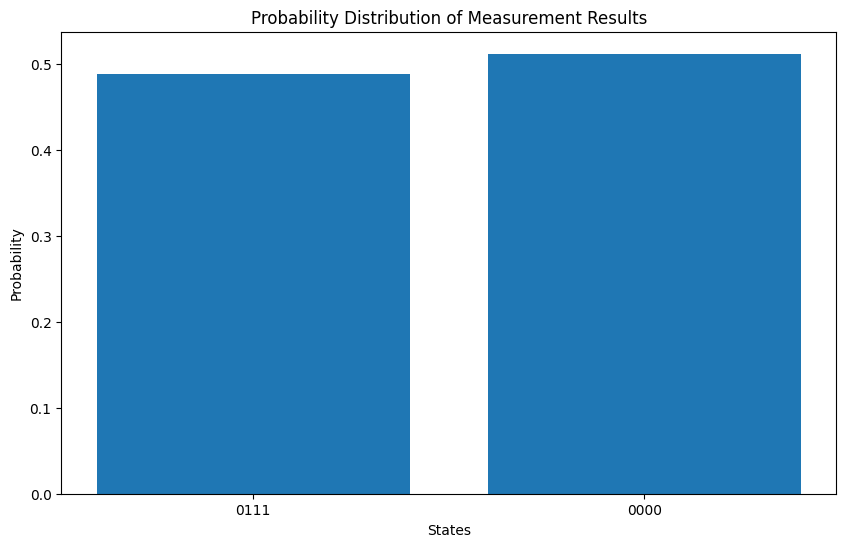

In [29]:
plt.figure(figsize=(10, 6))
plt.bar(states, probabilities)
plt.xlabel('States')
plt.ylabel('Probability')
plt.title('Probability Distribution of Measurement Results')
plt.show()